In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import scipy.stats as stats

In [2]:
df1=pd.read_excel(r'C:\Users\pbann\OneDrive\Desktop\science\data set\Customer Raw data.xlsx',sheet_name='sheet1')

C:\Users\pbann\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df1

,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric
0,CL0036386,Ikat stripe print cotton knit dress,Dress,84.95,33.95,Blue/navy/white,Blue,Cotton Spandex
1,CL0030567,Feminine pleated knit dress,Dress,59.95,41.95,Navy blue,Navy blue,Cotton Spandex
2,CL0032320,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton
3,CL0036700,Dot print cap sleeve shirt,Top,49.95,19.95,White/navy,White,Cotton
4,CL0036365,Layered asymmetric hem hacci knit top,Top,69.95,27.95,Blue,Blue,Polyester
...,...,...,...,...,...,...,...,...
711,CL0031288,Ruffle front poplin dress,Dress,69.95,52.95,Spring green,Spring green,Cotton
712,CL0032199,Beaded cotton poplin sheath dress,Dress,86.95,65.95,Spring green,Spring green,Cotton
713,CL0031267,Embellished stripe waist poplin dress,Dress,76.95,57.95,Spring green multi,Spring green multi,Cotton
714,CL0031287,Sash waist poplin skirt,Skirt,59.95,44.95,Spring green,Spring green,Cotton


In [4]:
df2=pd.read_excel(r'C:\Users\pbann\OneDrive\Desktop\science\data set\Customer Raw data.xlsx',sheet_name='sheet2')

C:\Users\pbann\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
df2

,pId,pName,clicks,carts,orders
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204
1,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70
2,CL0036758,Bird print pleated cotton knit dress,16343,340,97
3,CL0032310,Cotton knit fit and flare dress,16234,350,99
4,CL0037110,Pleat front chambray denim maxi dress,13317,229,56
...,...,...,...,...,...
2496,CL0036376,Name N/A,0,0,1
2497,CL0035627,Heart print cotton A-line dress,0,0,1
2498,GC0000202,Name N/A,0,0,5
2499,GC0000204,Name N/A,0,0,7


In [6]:
df2.rename(columns={'pId':'PID'},inplace=True)

In [7]:
df2

,PID,pName,clicks,carts,orders
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204
1,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70
2,CL0036758,Bird print pleated cotton knit dress,16343,340,97
3,CL0032310,Cotton knit fit and flare dress,16234,350,99
4,CL0037110,Pleat front chambray denim maxi dress,13317,229,56
...,...,...,...,...,...
2496,CL0036376,Name N/A,0,0,1
2497,CL0035627,Heart print cotton A-line dress,0,0,1
2498,GC0000202,Name N/A,0,0,5
2499,GC0000204,Name N/A,0,0,7


<AxesSubplot:xlabel='clicks', ylabel='orders'>

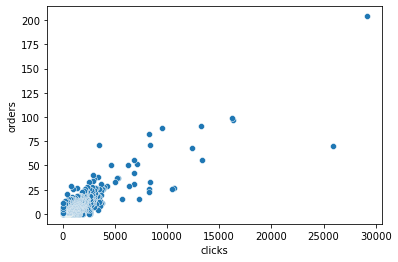

In [71]:
sns.scatterplot(x=df2['clicks'],y=df2['orders'])

In [75]:
df21=df2[df2['pName']=='Name N/A']
df21

,PID,pName,clicks,carts,orders
790,CL0034516_OS,Name N/A,420,0,12
799,CL0035152_OS,Name N/A,405,0,4
886,CL0034663_OS,Name N/A,311,0,0
904,CL0037242,Name N/A,300,4,1
907,CL0032845_OS,Name N/A,297,0,5
...,...,...,...,...,...
2495,CL0036125,Name N/A,0,0,3
2496,CL0036376,Name N/A,0,0,1
2498,GC0000202,Name N/A,0,0,5
2499,GC0000204,Name N/A,0,0,7


<AxesSubplot:xlabel='orders', ylabel='count'>

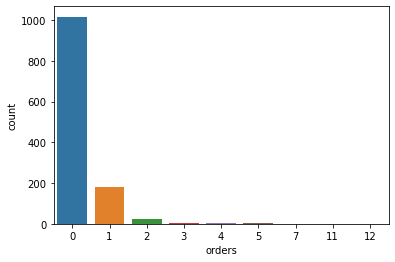

In [76]:
sns.countplot(x=df21['orders'])

# observations: This above data shows products which are having no name has no orders.

In [3]:
df3=pd.read_excel(r'C:\Users\pbann\OneDrive\Desktop\science\data set\Customer Raw data.xlsx',sheet_name='sheet3')
df3

C:\Users\pbann\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0
...,...,...,...,...,...,...,...
495,Pleated knit,14,12,6,42.86,0,0
496,Contrast,14,27,7,50.00,4,0
497,1940s,14,8,4,28.57,4,0
498,crimson,14,19,5,35.71,8,0


In [9]:
df=df2.merge(df1,on='PID')
df

,PID,pName,clicks,carts,orders,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric
0,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70,Chevron stripe colorblock maxi dress,Dress,99.95,79.95,Black/white/eggplant,Black,Cotton
1,CL0036758,Bird print pleated cotton knit dress,16343,340,97,Seagull print pleated cotton knit dress,Dress,89.95,67.95,Light blue/white/black,Light blue,Cotton Spandex
2,CL0037110,Pleat front chambray denim maxi dress,13317,229,56,Pleat front chambray denim maxi dress,Dress,69.95,52.95,Indigo,Indigo,Cotton
3,CL0037156,Chevron stripe colorblock maxi dress,12364,172,68,Chevron stripe colorblock maxi dress,Dress,99.95,79.95,Spring green/white/deep navy,Spring green,Cotton
4,CL0032320,Floral embellished chambray denim maxi dress,10680,72,27,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...
711,CL0036272,Olivia dress,30,0,0,Olivia dress,Dress,59.95,59.95,Khaki,Khaki,Cotton
712,CL0035517,Notch neck contrast trim crepe blouse,24,2,5,Notch neck contrast trim crepe blouse,Top,39.95,19.95,Lavender/white,Lavender,Polyester Spandex
713,CL0032128,Ribbon illusion yoke tank top,17,1,0,Ribbon illusion yoke tank top,Top,39.95,29.95,Spring green,Spring green,Cotton
714,CL0036879,Jersey knit surplice blouson top,15,0,4,Jersey knit surplice blouson top,Top,74.95,44.95,Loden green,Loden green,Viscose Spandex


In [28]:
df=df.drop(columns=['PID','pName','Product Name'])

In [70]:
df['Fabric'].unique()

array([' Cotton', ' Cotton Spandex', ' Polyester', ' Cotton Polyester',
       ' Cotton Nylon', ' Silk', ' Viscose Spandex',
       ' Polyester Crepe de Chine', ' Nylon Polyester',
       ' Polyamide Spandex', ' Polyester Rayon Spandex',
       ' Polyester Nylon', ' Rayon Nylon Spandex',
       ' Cotton Polyester Spandex', ' Polyester Spandex',
       ' Rayon Polyester Spandex', ' Nylon', ' Tencel', ' Nylon Cotton',
       ' Rayon', ' Cotton Rayon Spandex', ' Cotton Linen',
       ' Polyester Metallic', ' Viscose', ' Polyester Rayon',
       ' Wool Nylon'], dtype=object)

In [69]:
df['Fabric'].value_counts()

 Cotton                      263
 Cotton Spandex              139
 Polyester                   104
 Polyester Crepe de Chine     43
 Polyester Spandex            32
 Viscose Spandex              20
 Cotton Polyester Spandex     17
 Cotton Polyester             17
 Polyamide Spandex            12
 Rayon Nylon Spandex          12
 Silk                          7
 Rayon Polyester Spandex       7
 Rayon                         6
 Cotton Nylon                  6
 Polyester Rayon Spandex       4
 Polyester Nylon               4
 Viscose                       4
 Cotton Rayon Spandex          4
 Nylon                         3
 Tencel                        3
 Polyester Metallic            2
 Nylon Polyester               2
 Polyester Rayon               2
 Nylon Cotton                  1
 Cotton Linen                  1
 Wool Nylon                    1
Name: Fabric, dtype: int64

# observations: Cotton, Cotton Spandex, Polyster are the most preferred products by the customer

<AxesSubplot:xlabel='Category', ylabel='count'>

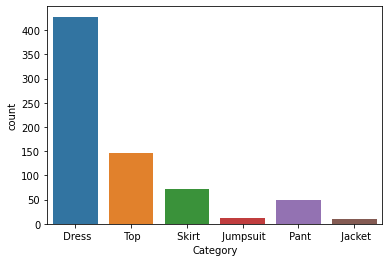

In [29]:
sns.countplot(x=df['Category'])

<AxesSubplot:xlabel='clicks', ylabel='orders'>

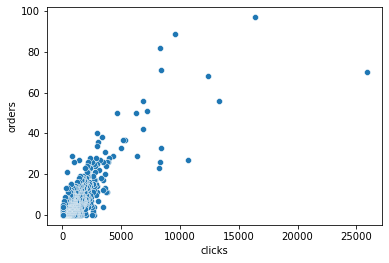

In [30]:
sns.scatterplot(x=df['clicks'],y=df['orders'])

In [80]:
df4= df.groupby(['Category','orders','clicks','Fabric']).size().reset_index()
df4

,Category,orders,clicks,Fabric,0
0,Dress,0,30,Cotton,1
1,Dress,0,62,Cotton,1
2,Dress,0,91,Polyester Spandex,1
3,Dress,0,119,Cotton,1
4,Dress,0,136,Cotton,1
...,...,...,...,...,...
711,Top,14,2195,Polyester,1
712,Top,15,768,Cotton Spandex,1
713,Top,24,2051,Cotton,1
714,Top,26,958,Cotton Spandex,1


In [81]:
df4['Category'].unique()

array([' Dress', ' Jacket', ' Jumpsuit', ' Pant', ' Skirt', ' Top'],
      dtype=object)

In [90]:
df5= df4[df4['Category']==' Dress']
df5

,Category,orders,clicks,Fabric,0
0,Dress,0,30,Cotton,1
1,Dress,0,62,Cotton,1
2,Dress,0,91,Polyester Spandex,1
3,Dress,0,119,Cotton,1
4,Dress,0,136,Cotton,1
...,...,...,...,...,...
423,Dress,70,25892,Cotton,1
424,Dress,71,8407,Cotton,1
425,Dress,82,8287,Cotton,1
426,Dress,89,9571,Cotton,1


<AxesSubplot:xlabel='Category', ylabel='orders'>

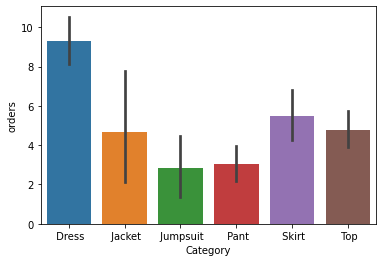

In [83]:
sns.barplot(x='Category',y='orders',data=df4)

   # observations: Dress is having max orders, jumpsuit is having min orders
   # preference sequence: Dress < Skirt < Top < Iacket < Pant < Jacket
    

<AxesSubplot:xlabel='Category', ylabel='clicks'>

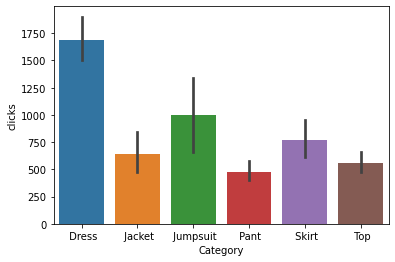

In [62]:
sns.barplot(x='Category',y='clicks',data=df4)

# observations: people are watching more Dress and jumpsuit categories


<AxesSubplot:xlabel='clicks', ylabel='orders'>

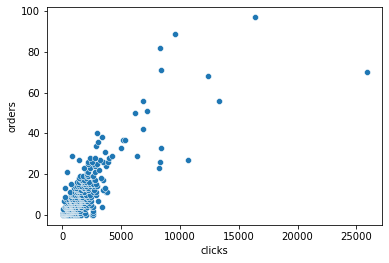

In [65]:
sns.scatterplot(y='orders',x='clicks',data=df5)

# observations: products which are getting more clicks have max order history